### Kaggle에서 데이터 다운로드

In [1]:
# !kaggle datasets download ashishkumarak/netflix-reviews-playstore-daily-updated

In [2]:
# !mkdir dataset; cd dataset; mkdir netflix

In [3]:
# !unzip netflix-reviews-playstore-daily-updated.zip -d dataset/netflix

In [4]:
# !mv netflix-reviews-playstore-daily-updated.zip dataset/netflix

In [5]:
import pandas as pd

In [6]:
# 데이터는 dataset/netflix 안에 있다.

df = pd.read_csv('dataset/netflix/netflix_reviews.csv')

### 1. 데이터셋 불러오기

In [7]:
# 상단 5개의 데이터를 불러오기 -> head() 메서드 사용, 인자는 5를 넘기면 상단 5개의 데이터를 불러온다.
df.head(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,09ed2c3a-a4ca-4241-a01c-e7543943ee05,reyes Cruz,Very good experience. Great customer service.,5,0,7.89.0 build 18 35322,2024-10-20 14:10:34,7.89.0 build 18 35322
1,b2d324ff-0005-45c4-accf-dc983124400d,NISITH DISSANAYAKE (Widenn Gamer),Bro I was watching w cartoon then this error c...,1,0,8.136.0 build 3 50908,2024-10-20 14:10:25,8.136.0 build 3 50908
2,2d619b1e-aca3-4807-b77f-c9446a606ddf,Evelyn Okoro,Desent,5,0,NaN,2024-10-20 14:06:08,NaN
3,03cc29b9-a49a-4e26-885a-d1652bb669be,Yogesh Bhatta,THIS IS SCAM COMPANY.. THEY JUST LOOT PEOPLE M...,1,0,7.98.0 build 7 35414,2024-10-20 14:02:13,7.98.0 build 7 35414
4,c1b98dcf-0b75-4952-b9ac-6165381f41cf,P3L0NAZ0,Stopped opening. I've uninstalled and reinstal...,1,0,8.136.0 build 3 50908,2024-10-20 14:01:12,8.136.0 build 3 50908


In [8]:
# 하단 5개의 데이터를 불러오기 -> tail() 메서드 사용, 인자는 5를 넘기면 하단 5개의 데이터를 불러온다.
df.tail(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
117035,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
117036,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117037,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117038,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346
117039,dc1352e9-10a8-41ca-ab23-05d045b08e90,suraj soni,"this app is awesome for english movies ,series...",4,0,NaN,2020-05-24 11:04:08,NaN


In [9]:
# 컬럼명들은 데이터프레임 객체의 columns 속성을 불러오면 된다.
df.columns

# 이 속성은 Index 타입으로 정의되어 있다.

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

In [10]:
# shape도 역시 데이터프레임 객체의 shape 속성을 불러오면 된다.
df.shape

# 이 속성은 (행의 개수, 열의 개수) 형태로, 튜플 타입으로 정의되어 있다.

(117040, 8)

### 2. 데이터 전처리

In [11]:
# 구두점, 숫자 등을 패턴화하여 제거하려면 정규식을 쓸 수 있는 내장 라이브러리 re를 로드해야 한다.
import re

# 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

In [12]:
# apply() 메서드를 활용하여 값들에 대해 일괄적으로 전처리 함수를 적용해 주도록 하자.
# 여기서는 리뷰가 담긴 content 열에 대해서 이를 수행하면 된다.

df.content = df.content.apply(preprocess_text)
df.head(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,09ed2c3a-a4ca-4241-a01c-e7543943ee05,reyes Cruz,very good experience great customer service,5,0,7.89.0 build 18 35322,2024-10-20 14:10:34,7.89.0 build 18 35322
1,b2d324ff-0005-45c4-accf-dc983124400d,NISITH DISSANAYAKE (Widenn Gamer),bro i was watching w cartoon then this error c...,1,0,8.136.0 build 3 50908,2024-10-20 14:10:25,8.136.0 build 3 50908
2,2d619b1e-aca3-4807-b77f-c9446a606ddf,Evelyn Okoro,desent,5,0,NaN,2024-10-20 14:06:08,NaN
3,03cc29b9-a49a-4e26-885a-d1652bb669be,Yogesh Bhatta,this is scam company they just loot people mon...,1,0,7.98.0 build 7 35414,2024-10-20 14:02:13,7.98.0 build 7 35414
4,c1b98dcf-0b75-4952-b9ac-6165381f41cf,P3L0NAZ0,stopped opening ive uninstalled and reinstalle...,1,0,8.136.0 build 3 50908,2024-10-20 14:01:12,8.136.0 build 3 50908


### 3. feature 분석 (EDA)

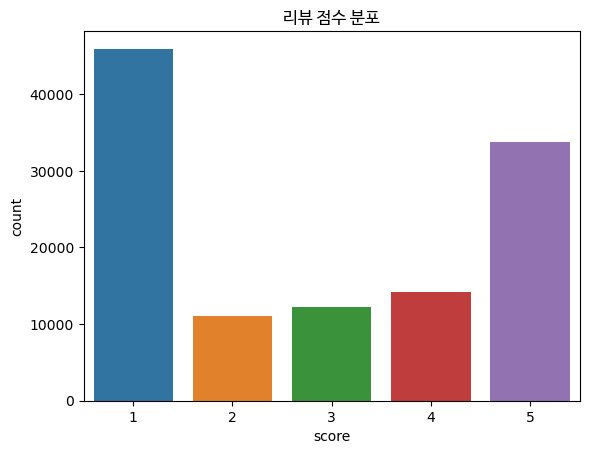

In [13]:
# 리뷰 점수 (score)에 따라 개수를 세서 그래프로 나타내기.
# seaborn 패키지에서는 집계 함수를 활용한 그래프를 그릴 수 있도록 해주고 있다.
import seaborn as sns

# countplot() 메서드는 기본적으로 데이터프레임, 시리즈, 딕셔너리 등을 데이터로 받으며,
# 키워드 인자로 x='score' 이라고 하면 score 열에 있는 각 값들의 개수를 세서 그래프로 나타낸다.
# 이때 그래프의 x축에 score 열의 값들이 라벨로 적혀 있게 된다. (xticks)
# (만약 키워드 인자를 x 대신 y를 적으면 y축에 score 열의 값들이 적힌다.)

# 또한 set_**** 식의 이름을 가진 그래프의 요소를 설정할 수 있는 메서드가 존재한다.
# 참고로 화면상 가로로 코드가 너무 길다 싶을 때는 백슬래시(\)를 쓰고 줄바꿈을 해서 계속 적으면
# 인터프리터가 백슬래시가 된 부분 다음 줄을 계속 이어서 한 줄로 해석한다. 줄마다 연속으로 붙이면 여러 줄을 한 줄로 해석할 수도 있다.
sns.countplot(df, x='score', hue='score', palette='tab10', legend=False)\
.set_title('리뷰 점수 분포')\
.set_fontfamily('NanumBarunGothic')

위 데이터를 봤을 때 문제가 될 수 있는 점은, score에 대한 리뷰 데이터 분포가 균일하지 않다는 점이다.<br>
만일 이 데이터를 그대로 사용한다면 1점과 5점 리뷰에 대해서만 과도하게 학습될 위험이 있다.

<Axes: xlabel='score', ylabel='count'>

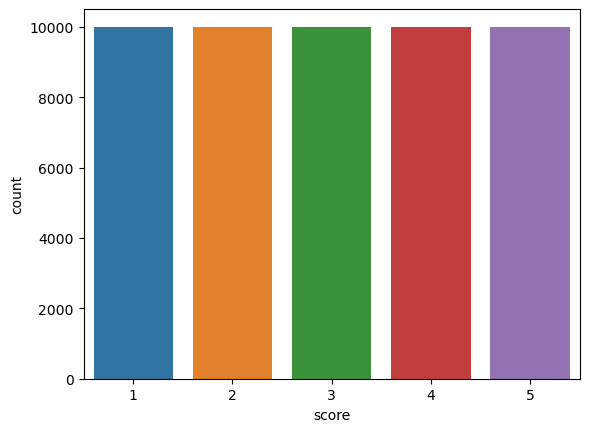

In [14]:
new_df = pd.DataFrame(columns=df.columns)

# 각 점수별로 10000개씩만 뽑아서 데이터를 다시 만든다.
for i in range(5):
    new_df = pd.concat([new_df, df[df.score == i + 1].sample(10000)])

# 10000개씩 잘 나눴는지 확인
sns.countplot(new_df, x='score', hue='score', palette='tab10', legend=False)

이제 분류별로 개수를 맞춰준 데이터를 활용하여 학습을 시켜보자.

### 4. 리뷰 예측 모델 학습시키기 (LSTM)

In [15]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

/opt/anaconda3/lib/python3.11/site-packages/torchtext/data/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/opt/anaconda3/lib/python3.11/site-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/opt/anaconda3/lib/python3.11/site-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext i

In [16]:
# 데이터셋 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, reviews, ratings, text_pipeline, label_pipeline):
        self.reviews = reviews
        self.ratings = ratings
        self.text_pipeline = text_pipeline
        self.label_pipeline = label_pipeline

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = self.text_pipeline(self.reviews[idx])
        rating = self.label_pipeline(self.ratings[idx])
        return torch.tensor(review), torch.tensor(rating)

In [17]:
import re

# 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

In [18]:
# 데이터 불러오고 사소한 전처리를 먼저 함.
df = pd.read_csv('dataset/netflix/netflix_reviews.csv')
df.content = df.content.apply(preprocess_text)

new_df = pd.DataFrame(columns=df.columns)
for i in range(5):
    new_df = pd.concat([new_df, df[df.score == i + 1].sample(10000)])

In [19]:
# 학습 데이터와 검증 데이터로 나누기
train_reviews, test_reviews, train_ratings, test_ratings \
= train_test_split(new_df.content.to_list(), new_df.score.to_list(), test_size=0.2, random_state=1023)

In [20]:
# 토큰화 함수와 단어 집합을 정의
tokenizer = get_tokenizer('basic_english')
vocab = build_vocab_from_iterator(map(tokenizer, train_reviews), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

In [21]:
# 배치 처리를 위해 정의
max_size = max(len(k.split()) for k in train_reviews + test_reviews)

# 위의 함수와 집합을 이용하여 전처리 파이프라인을 구성.
def text_pipeline(text, size=max_size):
    k = [vocab[token] for token in tokenizer(text)]
    # 배치 처리를 위해 벡터의 길이를 맞춰준다.
    return k + [0] * (size - len(k))

label_pipeline = lambda label: [float(i + 1 == label) for i in range(5)]

In [22]:
# 데이터셋 정의
train_dataset = ReviewDataset(train_reviews, train_ratings, text_pipeline, label_pipeline)
test_dataset = ReviewDataset(test_reviews, test_ratings, text_pipeline, label_pipeline)

# 데이터 로더 정의
BATCH_SIZE = 40

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [23]:
# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax()
        
    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.lstm(embedded.unsqueeze(0))
        output = self.fc(output[-1])
        return self.softmax(output)

# 하이퍼파라미터 정의
VOCAB_SIZE = len(vocab)
EMBED_DIM = 96
HIDDEN_DIM = 192
OUTPUT_DIM = 5 # 예측할 점수 개수

# 모델 초기화
model = LSTMModel(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [24]:
# for i, data in enumerate(train_dataloader):
#     if i >= 1: break
#     inputs, labels = data

# model(inputs)

In [30]:
# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(model.parameters(), lr=0.03)

# 모델 학습은 직접 작성해보세요!!!

for epoch in range(40):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 손실 출력
        running_loss += loss.item()
        if i % 100 == 99:  # 매 100 미니배치마다 출력
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

[Epoch 1, Batch 100] loss: 1.630
[Epoch 1, Batch 200] loss: 1.507
[Epoch 1, Batch 300] loss: 1.458
[Epoch 1, Batch 400] loss: 1.440
[Epoch 1, Batch 500] loss: 1.438
[Epoch 1, Batch 600] loss: 1.436
[Epoch 1, Batch 700] loss: 1.431
[Epoch 1, Batch 800] loss: 1.427
[Epoch 1, Batch 900] loss: 1.423
[Epoch 1, Batch 1000] loss: 1.414
[Epoch 2, Batch 100] loss: 1.411
[Epoch 2, Batch 200] loss: 1.411
[Epoch 2, Batch 300] loss: 1.403
[Epoch 2, Batch 400] loss: 1.413
[Epoch 2, Batch 500] loss: 1.404
[Epoch 2, Batch 600] loss: 1.402
[Epoch 2, Batch 700] loss: 1.413
[Epoch 2, Batch 800] loss: 1.403
[Epoch 2, Batch 900] loss: 1.408
[Epoch 2, Batch 1000] loss: 1.412
[Epoch 3, Batch 100] loss: 1.391
[Epoch 3, Batch 200] loss: 1.405
[Epoch 3, Batch 300] loss: 1.397
[Epoch 3, Batch 400] loss: 1.399
[Epoch 3, Batch 500] loss: 1.381
[Epoch 3, Batch 600] loss: 1.401
[Epoch 3, Batch 700] loss: 1.392
[Epoch 3, Batch 800] loss: 1.393
[Epoch 3, Batch 900] loss: 1.398
[Epoch 3, Batch 1000] loss: 1.394
[Epoch 

In [29]:
text = "This app is great but has some bugs."

tensor_review = torch.tensor(text_pipeline(text))
output = model(tensor_review.reshape(-1, max_size))
output

tensor([[0.0046, 0.0149, 0.0397, 0.2570, 0.6838]], grad_fn=<SoftmaxBackward0>)

In [7]:
# 예측 함수(예시)
def predict_review(model, review):
    model.eval()
    with torch.no_grad():
        tensor_review = torch.tensor(text_pipeline(review))
        output = model(tensor_review)
        prediction = output.argmax(1).item()
        return label_encoder.inverse_transform([prediction])[0]

# 새로운 리뷰에 대한 예측
new_review = "This app is great but has some bugs."
predicted_score = predict_review(model, new_review)
print(f'Predicted Score: {predicted_score}')

---

In [1]:
import pandas as pd
import re

df = pd.read_csv('dataset/netflix/netflix_reviews.csv')

# 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

df.content = df.content.apply(preprocess_text)
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,09ed2c3a-a4ca-4241-a01c-e7543943ee05,reyes Cruz,very good experience great customer service,5,0,7.89.0 build 18 35322,2024-10-20 14:10:34,7.89.0 build 18 35322
1,b2d324ff-0005-45c4-accf-dc983124400d,NISITH DISSANAYAKE (Widenn Gamer),bro i was watching w cartoon then this error c...,1,0,8.136.0 build 3 50908,2024-10-20 14:10:25,8.136.0 build 3 50908
2,2d619b1e-aca3-4807-b77f-c9446a606ddf,Evelyn Okoro,desent,5,0,NaN,2024-10-20 14:06:08,NaN
3,03cc29b9-a49a-4e26-885a-d1652bb669be,Yogesh Bhatta,this is scam company they just loot people mon...,1,0,7.98.0 build 7 35414,2024-10-20 14:02:13,7.98.0 build 7 35414
4,c1b98dcf-0b75-4952-b9ac-6165381f41cf,P3L0NAZ0,stopped opening ive uninstalled and reinstalle...,1,0,8.136.0 build 3 50908,2024-10-20 14:01:12,8.136.0 build 3 50908
...,...,...,...,...,...,...,...,...
117035,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it there are so many movies and ...,5,0,NaN,2019-08-03 15:06:03,NaN
117036,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,i love netflix i always enjoy my time using it,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117037,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117038,32870f7f-c461-4256-b602-75244ca60248,A Google user,rate is very expensive bcos we see netflix sun...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


### 5. NLP 이용해보기

In [2]:
# 텍스트 전처리와 자연어 처리를 위한 라이브러리
import nltk
from textblob import TextBlob

# 토픽 모델링을 위한 라이브러리
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# 감성 분석을 위한 함수
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['content'].apply(get_sentiment)
# df에 sentiment 값을 적용을 먼저 하시고, 아래와 같이 긍정과 부정을 분류하세요.
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))

df[['content', 'score', 'sentiment_label']]

,content,score,sentiment_label
0,very good experience great customer service,5,positive
1,bro i was watching w cartoon then this error c...,1,negative
2,desent,5,neutral
3,this is scam company they just loot people mon...,1,positive
4,stopped opening ive uninstalled and reinstalle...,1,neutral
...,...,...,...
117035,i really like it there are so many movies and ...,5,positive
117036,i love netflix i always enjoy my time using it,5,positive
117037,sound quality is very slow of movies,1,neutral
117038,rate is very expensive bcos we see netflix sun...,1,negative


### 6. 긍정 / 부정 리뷰의 워드 클라우드 그려보기

In [3]:
# 부정적인 리뷰와 긍정적인 리뷰를 일단 모은다.
negative_reviews = df[df.sentiment_label == 'negative'].content
positive_reviews = df[df.sentiment_label == 'positive'].content

In [4]:
# 긍정 텍스트와 부정 텍스트에서 공통으로 존재하는 단어를 intersection 집합에 넣자.
negative_set = set(n for n in ' '.join(negative_reviews.values).split())
positive_set = set(p for p in ' '.join(positive_reviews.values).split())
intersection = negative_set & positive_set

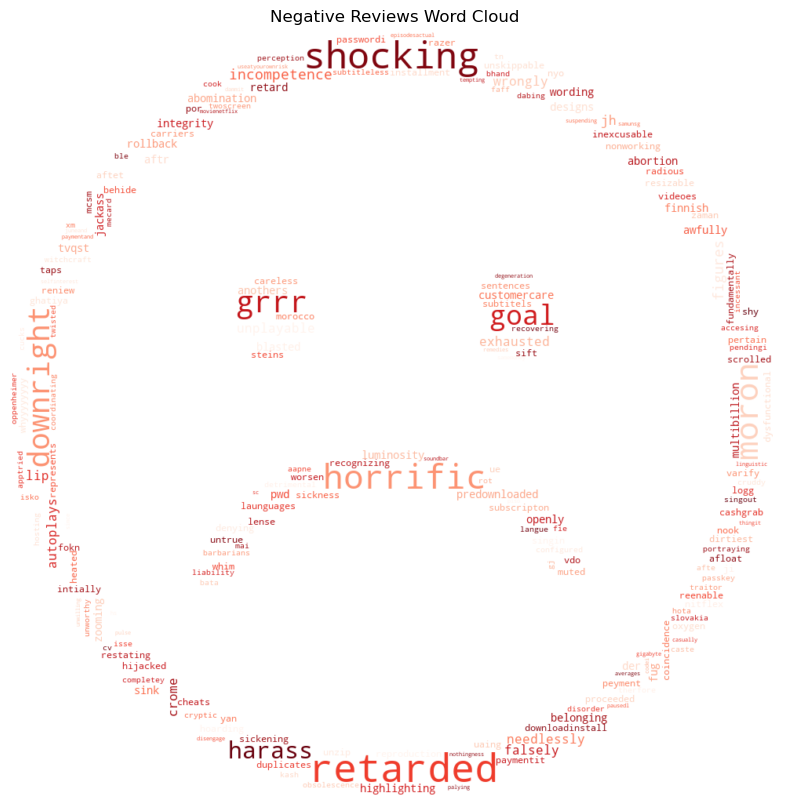

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# 불용어를 먼저 제거
stopwords = set(STOPWORDS)

# 필요 없는 단어를 update() 메서드로 수동으로 추가해 줄 수도 있다.
# 여기서는 위에서 만든 intersection을 넣어보자.
stopwords.update(intersection)

# 워드 클라우드를 그려낼 밑그림 추가.
mask = np.array(Image.open('frowning_face.png'))

# WordCloud 객체 생성하기
# generate 메서드 안에 있는 텍스트를 띄어쓰기 단위로 나누어 단어로 인식하고, 그것들의 개수를 각각 센다.
# 단, stopwards 안에 있는 단어는 집계하지 않는다.
neg_wc = WordCloud(width=1000, height=1000, background_color='white',
                      stopwords=stopwords, mask=mask, colormap='Reds').generate(' '.join(negative_reviews.values))

plt.figure(figsize=(10, 10))
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

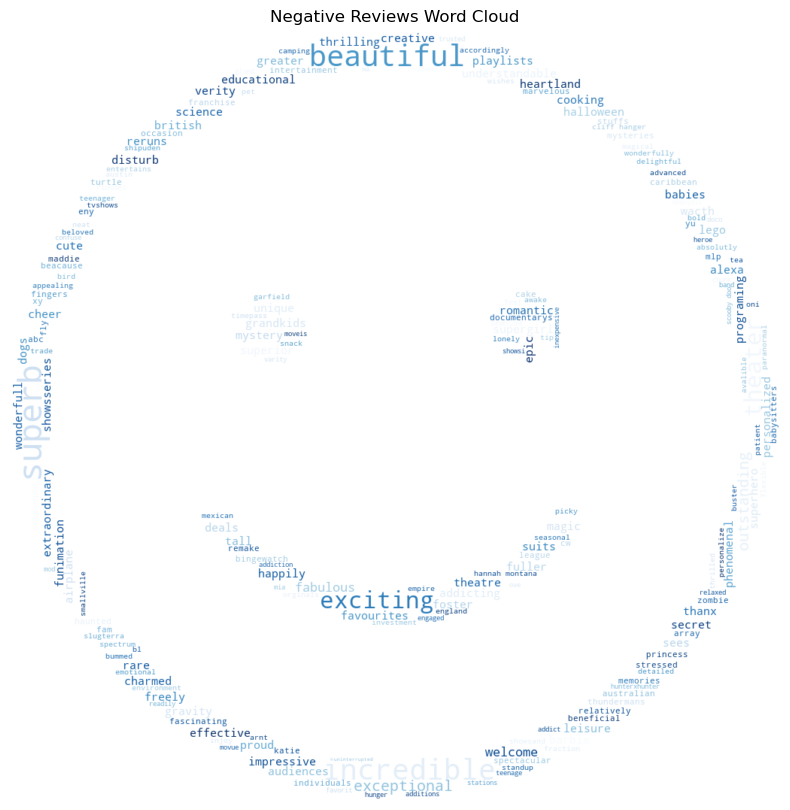

In [6]:
# 긍정적인 리뷰에 대해서도 나타내 보자.

mask = np.array(Image.open('smiley_face.png'))

pos_wc = WordCloud(width=1000, height=1000, background_color='white',
                      stopwords=stopwords, mask=mask, colormap='Blues').generate(' '.join(positive_reviews.values))

plt.figure(figsize=(10, 10))
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()